In [2]:
import math
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (13,8)
# plt.style.use('xkcd')
plt.xkcd()
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 16

In [8]:
doubling_time = 6 # In days
total_population = 50e6
days = np.linspace(0, 100, 101)
cum_cases = 2**(days/doubling_time)
cum_cases = np.round(cum_cases).astype('int')
new_cases = np.diff(cum_cases)
healthy = total_population - cum_cases

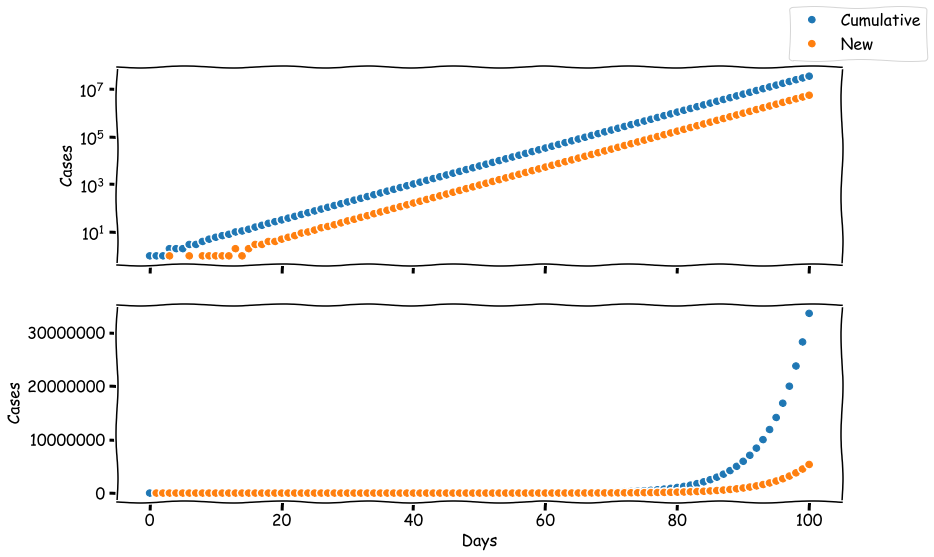

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(days, cum_cases, 'o')
ax[0].plot(days[1:], new_cases, 'o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Cases')
ax[1].plot(days, cum_cases, 'o')
ax[1].plot(days[1:], new_cases, 'o')
ax[1].set_ylabel('Cases')
fig.legend(['Cumulative', 'New'])
ax[1].set_xlabel('Days')
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))

Text(0.5, 0, 'Days')

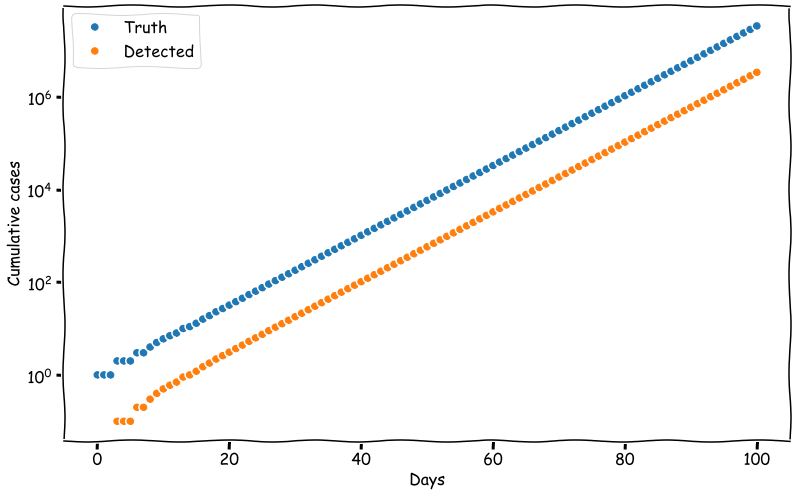

In [10]:
sampling_efficiency = .1
detected_cases_day = .1*new_cases
total_detected_cases = np.cumsum(detected_cases_day)
fig, ax = plt.subplots(1, 1)
ax.plot(days, cum_cases, 'o')
ax.plot(days[1:], total_detected_cases, 'o')
ax.set_yscale('log')
ax.legend(['Truth', 'Detected'])
ax.set_ylabel('Cumulative cases')
ax.set_xlabel('Days')

Text(0.5, 0, 'Days')

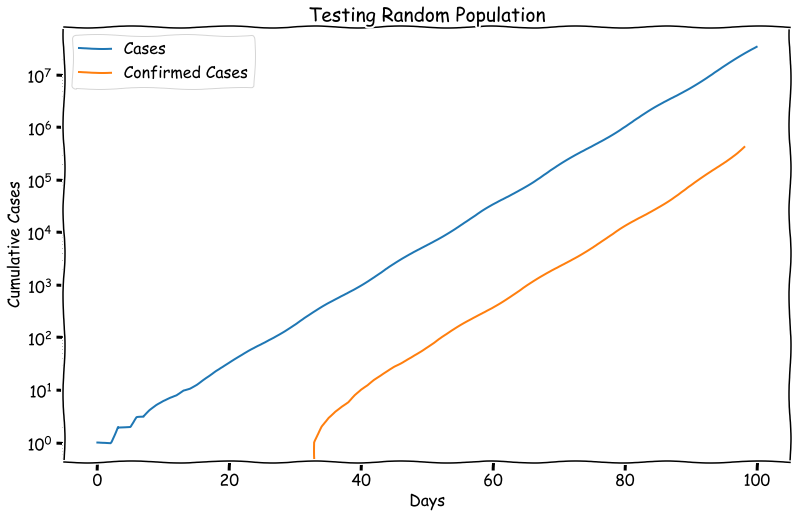

In [11]:
population_testing = 500000
prob_detection = new_cases[:-1]/healthy[1:-1]*population_testing
prob_detection = np.round(prob_detection)
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.title('Testing Random Population')
plt.legend(['Cases', 'Confirmed Cases'])
plt.ylabel('Cumulative Cases')
plt.xlabel('Days')

Text(0.5, 0, 'Days')

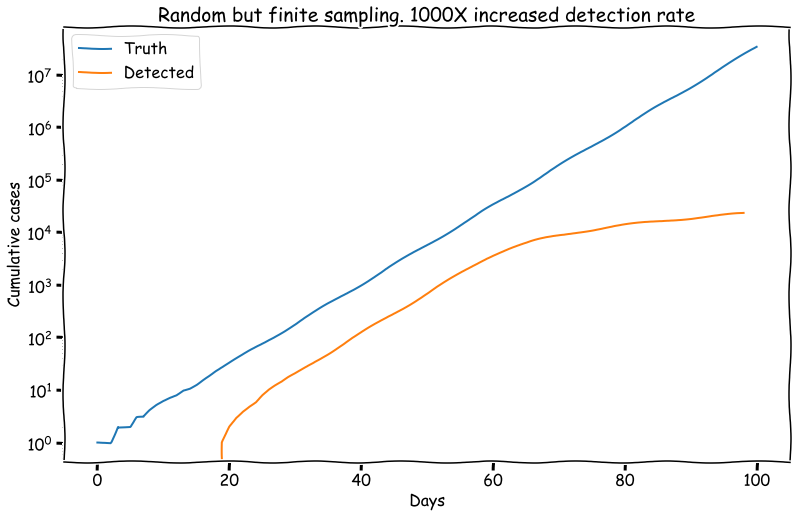

In [12]:
testing_capacity = 500
prob_detection = 10000*new_cases[:-1]/healthy[1:-1]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Random but finite sampling. 1000X increased detection rate')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

In [13]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Text(0.5, 0, 'Days')

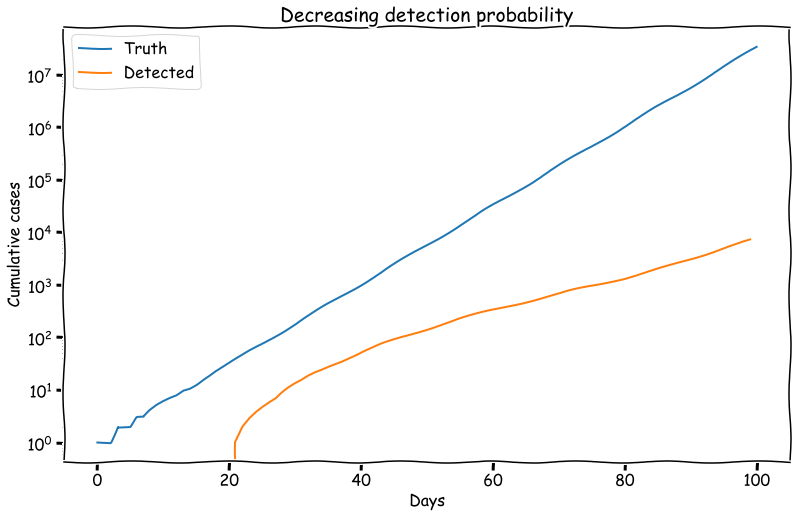

In [14]:
testing_capacity = 500
diff = np.ones(len(new_cases))
diff[new_cases>0] = new_cases[new_cases>0]
increase_rate = 9990*sigmoid(-.12*days[1:]+4.1)+10
prob_detection = increase_rate*new_cases/healthy[1:]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity
cum_detection = np.cumsum(prob_detection)
plt.plot(cum_cases)
plt.plot(cum_detection)
plt.yscale('log')
plt.legend(['Truth', 'Detected'])
plt.title('Decreasing detection probability')
plt.ylabel('Cumulative cases')
plt.xlabel('Days')

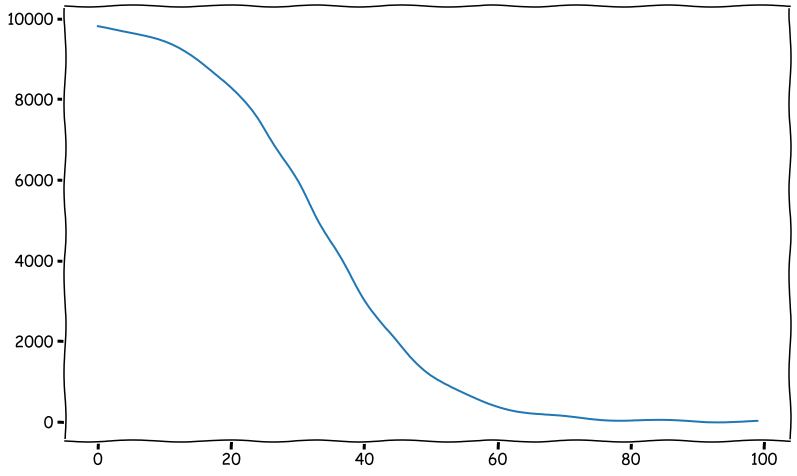

In [15]:
plt.plot(increase_rate)

Text(0.5, 1.0, 'Increasing testing capacity every 10 days')

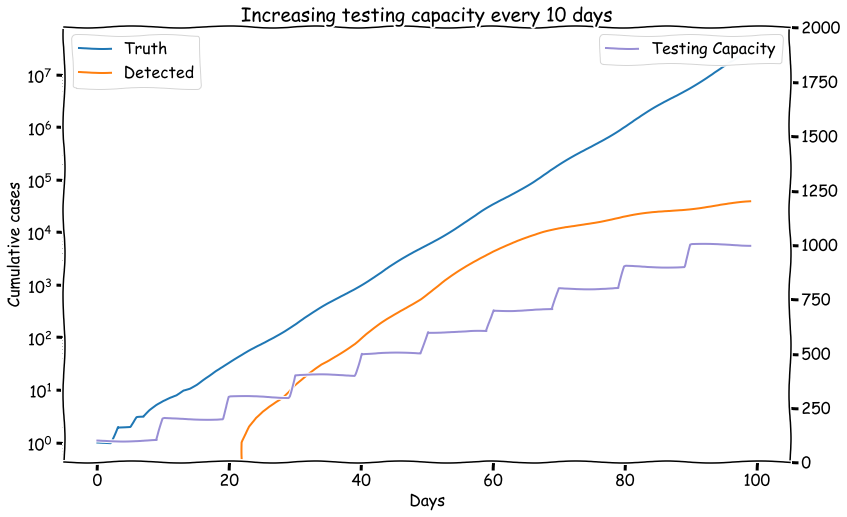

In [16]:
increase_step = 100
testing_capacity = increase_step * \
    (1+np.heaviside(days-10, 1) + np.heaviside(days-20, 1) + np.heaviside(days-30, 1) + np.heaviside(days-40, 1)
      + np.heaviside(days-50, 1) + np.heaviside(days-60, 1) + np.heaviside(days-70, 1) + np.heaviside(days-80, 1)
      + np.heaviside(days-90, 1)
    )
    
testing_capacity = testing_capacity[:-1]
prob_detection = 10000*new_cases/healthy[1:]*testing_capacity
prob_detection = np.round(prob_detection)
prob_detection[prob_detection>testing_capacity] = testing_capacity[prob_detection>testing_capacity]
cum_detection = np.cumsum(prob_detection)
fix, ax = plt.subplots()
ax.plot(cum_cases)
ax.plot(cum_detection)
ax.set_ylabel('Cumulative cases')
ax.set_xlabel('Days')
ax.set_yscale('log')
ax.legend(['Truth', 'Detected'])

ax2 = plt.twinx()
ax2.plot(testing_capacity, color='#988ED5')
ax2.set_ylim(0,2000)
ax2.legend(['Testing Capacity'])
plt.title('Increasing testing capacity every 10 days')


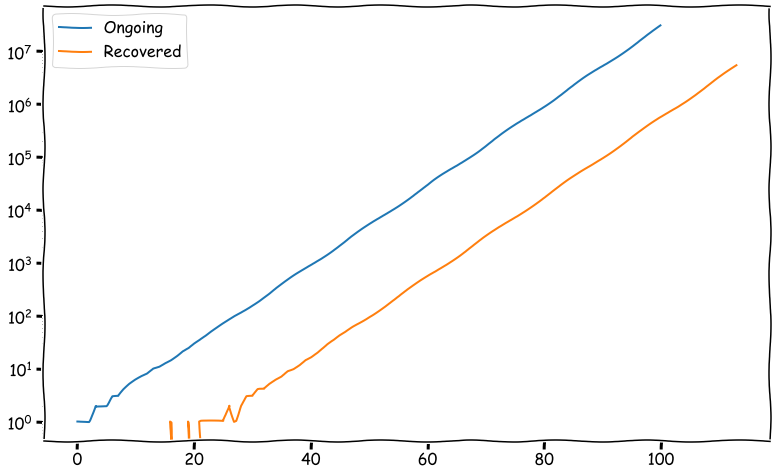

In [17]:
days_to_recover = 14
recovered = np.zeros(len(new_cases)+days_to_recover)
recovered[days_to_recover:] = new_cases
cum_recovered = np.cumsum(recovered[:-days_to_recover+1])
ongoing = cum_cases - cum_recovered
plt.plot(ongoing)
plt.plot(recovered)
plt.yscale('log')
plt.legend(['Ongoing', 'Recovered'])

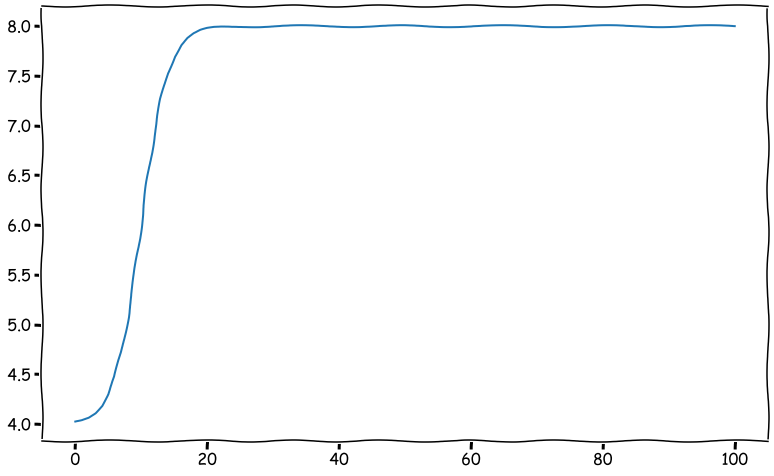

In [18]:
variable_doubling_time = 1*sigmoid(.5*days-5)*doubling_time+doubling_time
plt.plot(variable_doubling_time)

In [19]:
variable_cum_cases = np.zeros(len(days))
variable_cum_cases[0] = 1
for i in range(1, len(variable_cum_cases)):
    variable_cum_cases[i] = variable_cum_cases[i-1]*2**(1/variable_doubling_time[i])
variable_cum_cases = np.round(variable_cum_cases).astype('int')
variable_new_cases = np.diff(variable_cum_cases)
healthy = total_population - variable_cum_cases

Text(0.5, 0, 'Days')

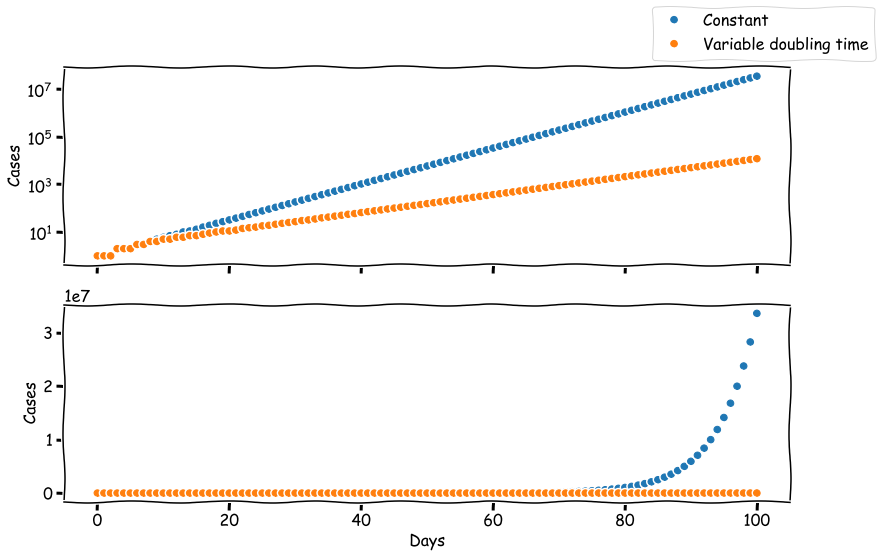

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(days, cum_cases, 'o')
ax[0].plot(days, variable_cum_cases, 'o')
ax[0].set_yscale('log')
ax[0].set_ylabel('Cases')
ax[1].plot(days, cum_cases, 'o')
ax[1].plot(days, variable_cum_cases, 'o')
ax[1].set_ylabel('Cases')
fig.legend(['Constant', 'Variable doubling time'])
ax[1].set_xlabel('Days')

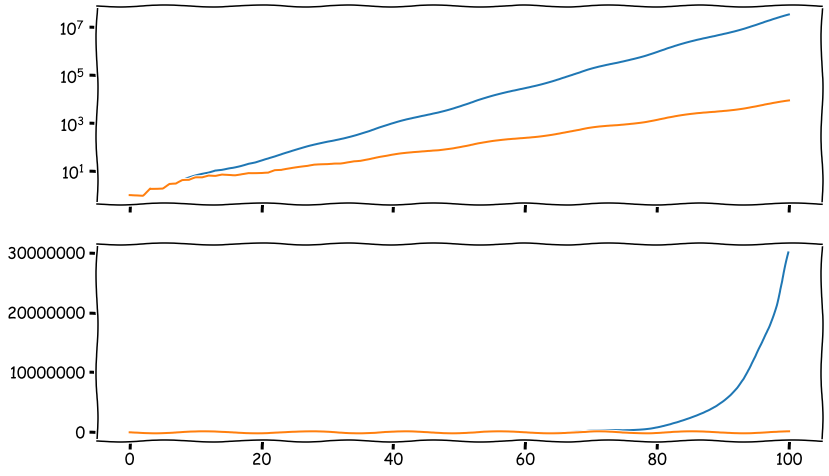

In [21]:
variable_recovered = np.zeros(len(variable_new_cases)+days_to_recover)
variable_recovered[days_to_recover:] = variable_new_cases
variable_cum_recovered = np.cumsum(variable_recovered[:-days_to_recover+1])
variable_ongoing = variable_cum_cases - variable_cum_recovered

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(ongoing)
ax[0].plot(variable_ongoing)
ax[0].set_yscale('log')

ax[1].plot(ongoing)
ax[1].plot(variable_ongoing)
ax[1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))

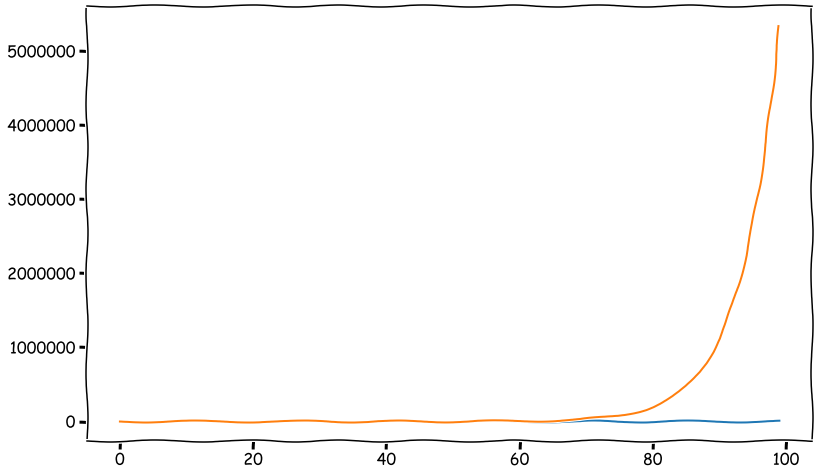

In [22]:
plt.plot(variable_new_cases)
plt.plot(new_cases)

## Plots of exponential evolution

In [52]:
plt.rcdefaults()

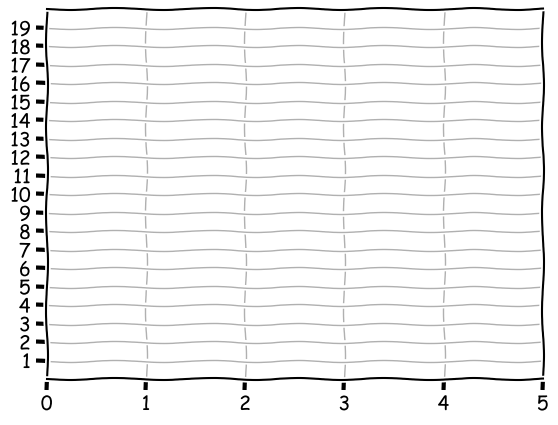

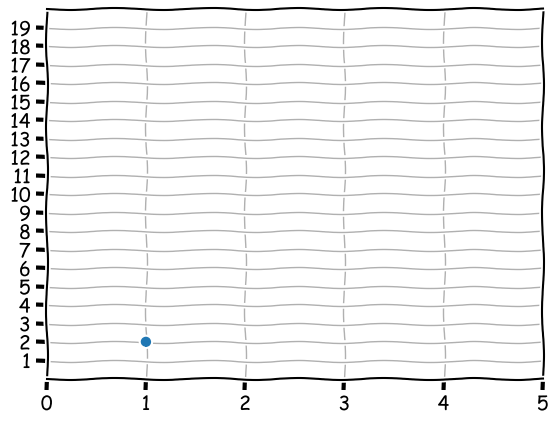

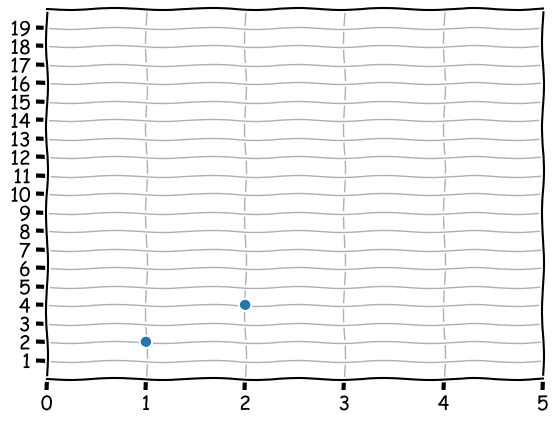

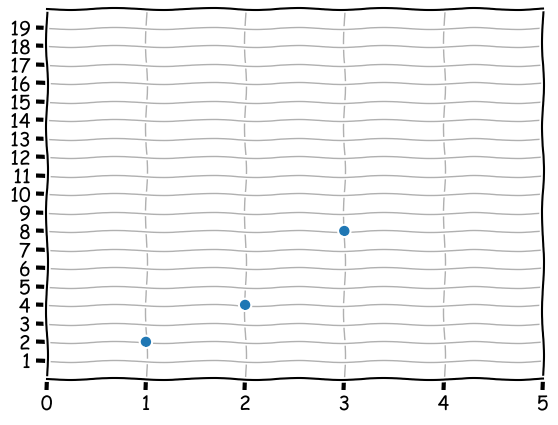

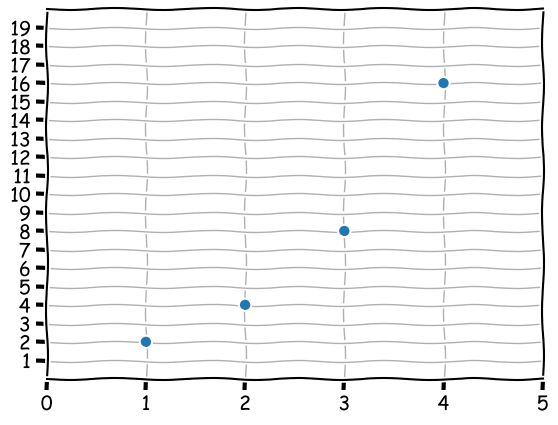

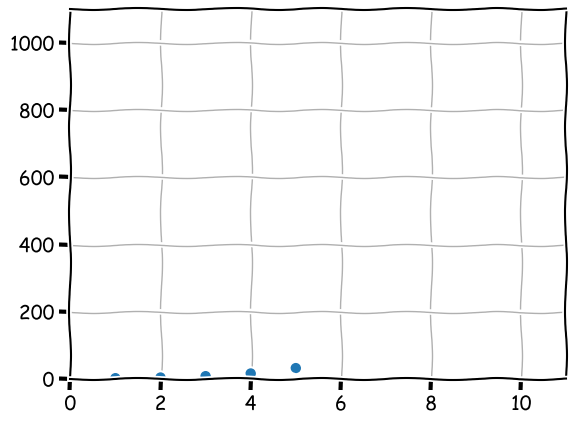

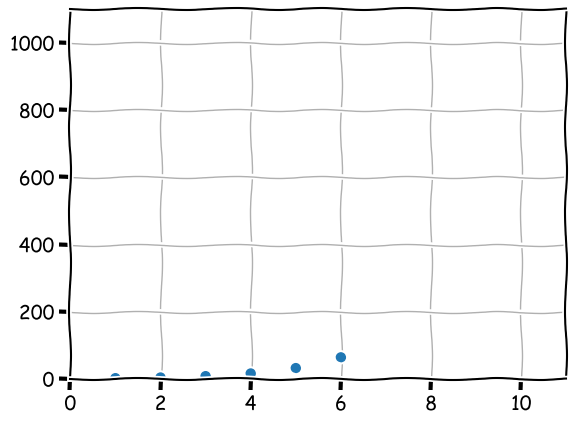

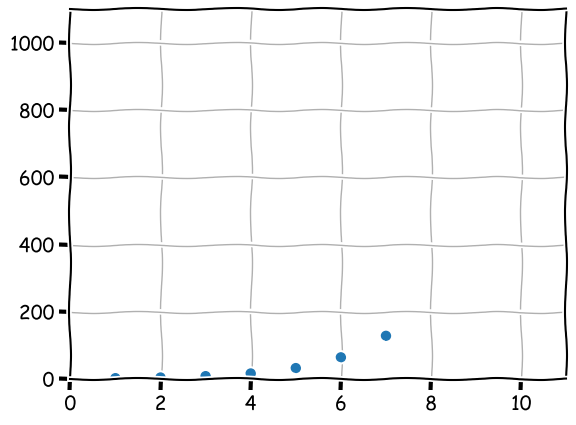

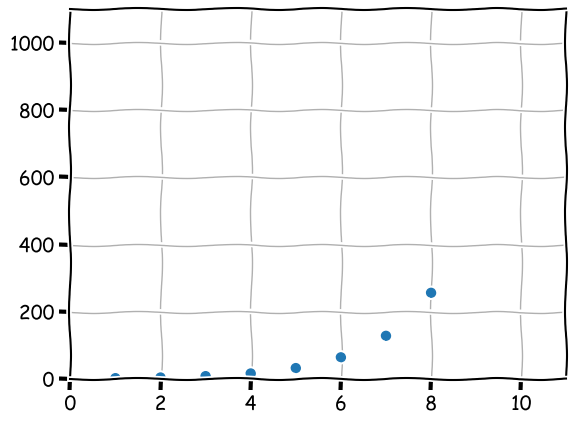

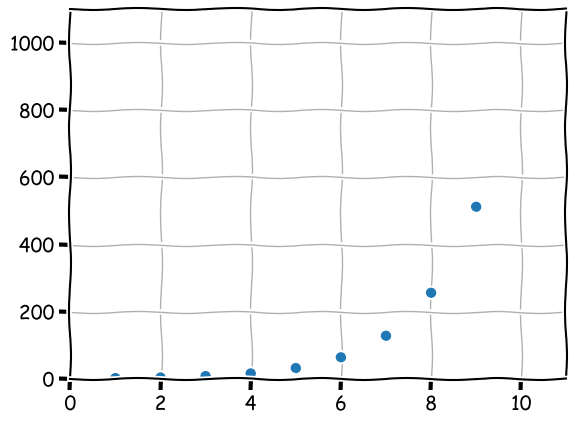

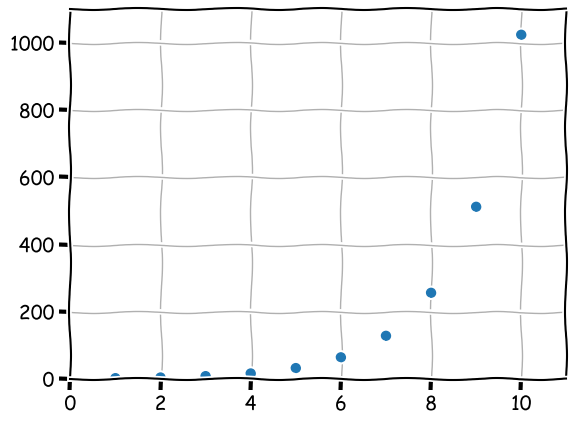

In [85]:
plt.xkcd()
x = np.arange(1, 11)
y = 2**x
for i in range(5):
    fig, ax = plt.subplots()
    ax.plot(x[:i], y[:i], 'o')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 20)
    ax.set_yticks(np.arange(1, 20))
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    plt.savefig(f'Figures_Movie/01_Exponential_2/{i}.png', fig=fig)
    
for i in range(5, len(x)+1):
    fig, ax = plt.subplots()
    ax.plot(x[:i], y[:i], 'o')
    ax.set_xlim(0, 11)
    ax.set_ylim(0, 1100)
#     ax.set_yticks(np.arange(1, 20))
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    plt.savefig(f'Figures_Movie/01_Exponential_2/{i}.png', fig=fig)

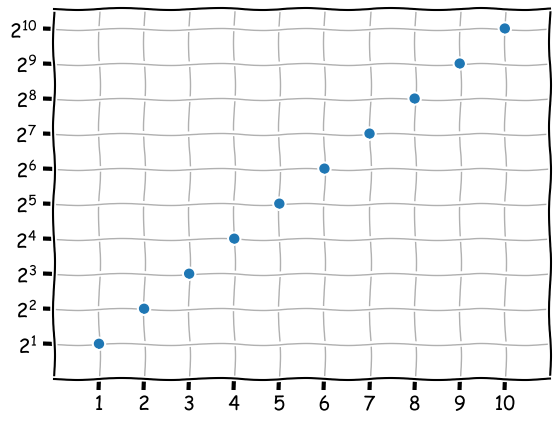

In [95]:
plt.xkcd()
x = np.arange(1, 11)
y = 2**x
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_xlim(0, 11)
ax.set_ylim(1, 1500)
ax.set_yscale('log', basey=2)
ax.set_yticks(y)
ax.set_xticks(x)
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig('Figures_Movie/02_Exponential_2/Log_Lin.png', fig=fig)

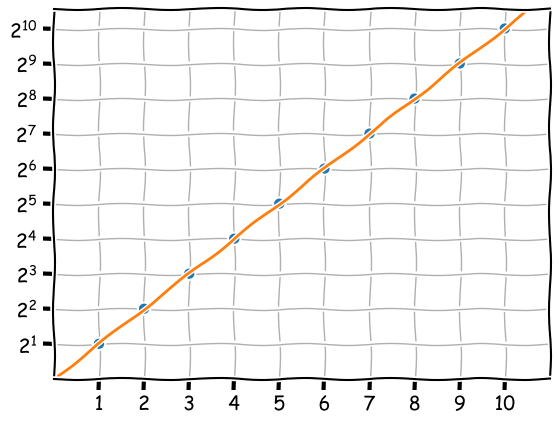

In [96]:
plt.xkcd()
x = np.arange(1, 11)
y = 2**x
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot([0, 12], [1, 2**12], '-')
ax.set_xlim(0, 11)
ax.set_ylim(1, 1500)
ax.set_yscale('log', basey=2)
ax.set_yticks(y)
ax.set_xticks(x)
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig('Figures_Movie/02_Exponential_2/Log_Lin_Fit.png', fig=fig)

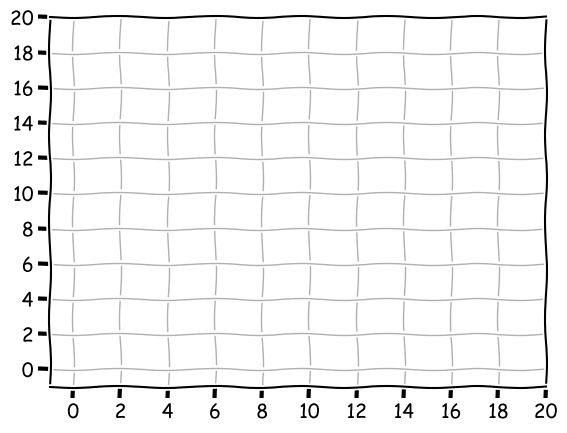

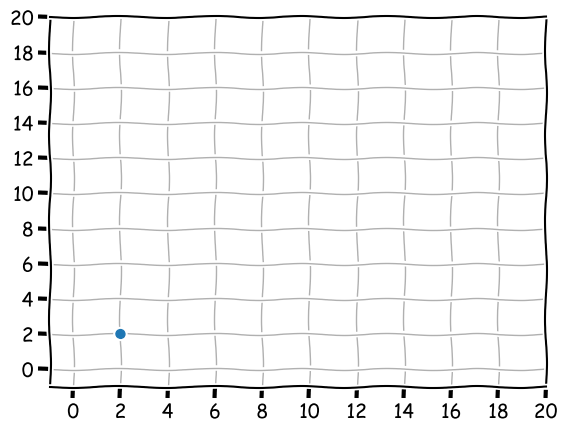

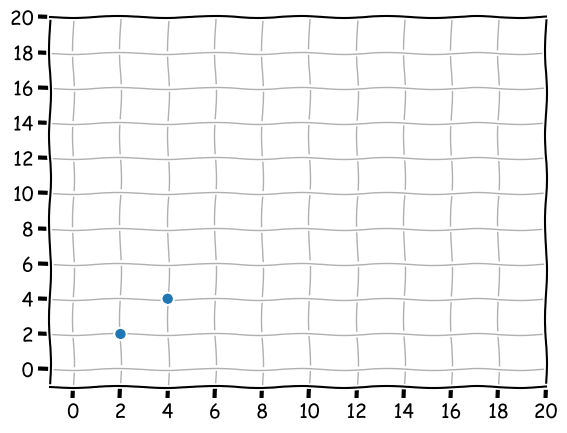

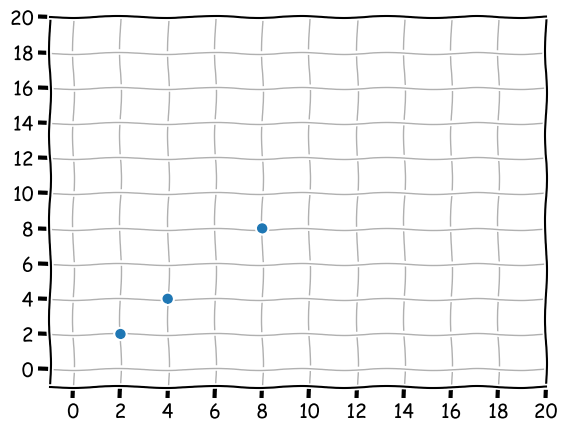

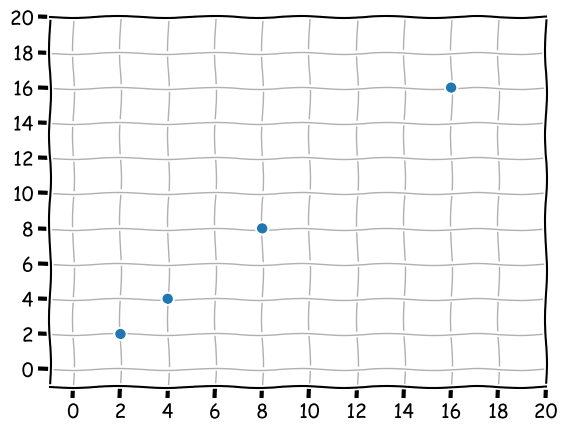

In [136]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
for i in range(5):
    fig, ax = plt.subplots(1)
    ax.plot(y[:i], diff[:i], 'o')
    ax.set_xlim(-1, 20)
    ax.set_ylim(-1, 20)
    ax.set_yticks(np.arange(0, 21, 2))
    ax.set_xticks(np.arange(0, 21, 2))
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    plt.savefig(f'Figures_Movie/02_Log_Log/diff_val_{i+1}.png')

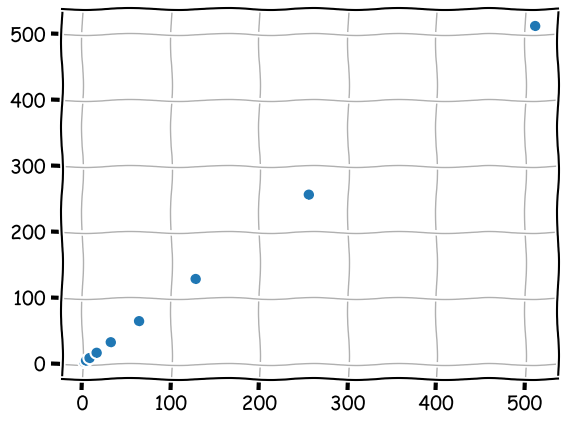

In [139]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots(1)
ax.plot(y[:-1], diff, 'o')
# ax.set_yticks(np.arange(0, 21, 2))
# ax.set_xticks(np.arange(0, 21, 2))
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig(f'Figures_Movie/02_Log_Log/diff_val_lin.png')

(1.515716566510398, 1024.0)
(1.515716566510398, 675.5880503157221)


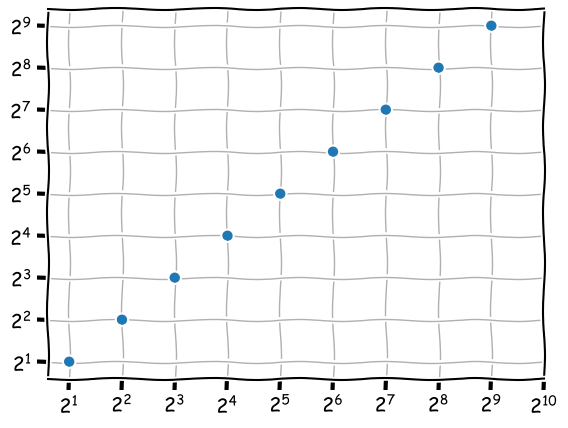

In [148]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots(1)
ax.plot(y[:-1], diff, 'o')
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.set_yticks(diff)
ax.set_xticks(y)
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig(f'Figures_Movie/02_Log_Log/diff_val_log_log.png')

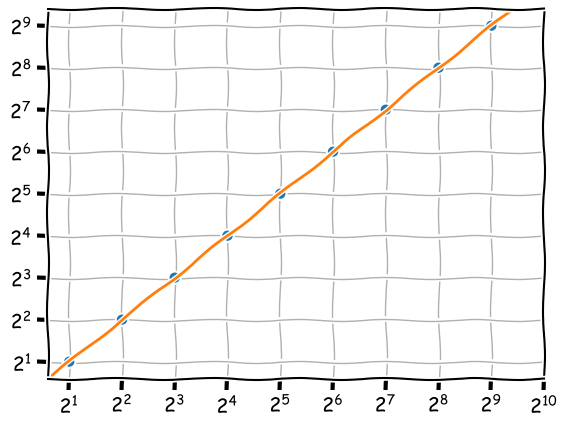

In [149]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots(1)
ax.plot(y[:-1], diff, 'o')
ax.plot([1, 2**11], [1, 2**11])
ax.set_yscale('log', basey=2)
ax.set_xscale('log', basex=2)
ax.set_xlim(1.515716566510398, 1024.0)
ax.set_ylim(1.515716566510398, 675.5880503157221)
ax.set_yticks(diff)
ax.set_xticks(y)
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig(f'Figures_Movie/02_Log_Log/diff_val_log_log_fit.png')

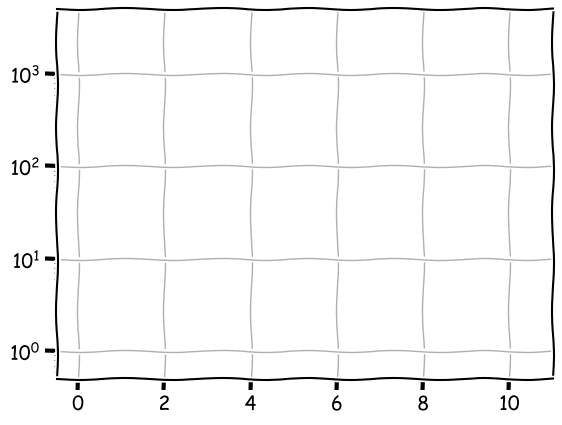

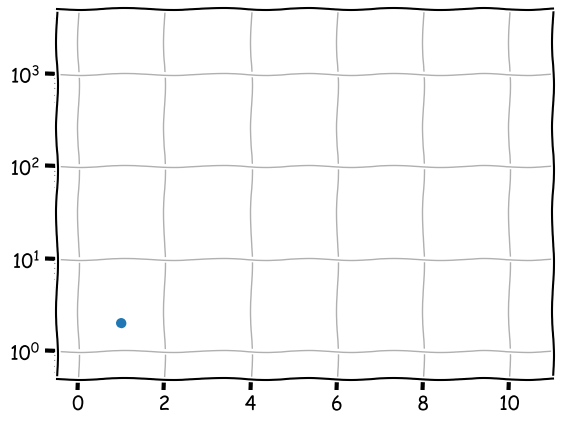

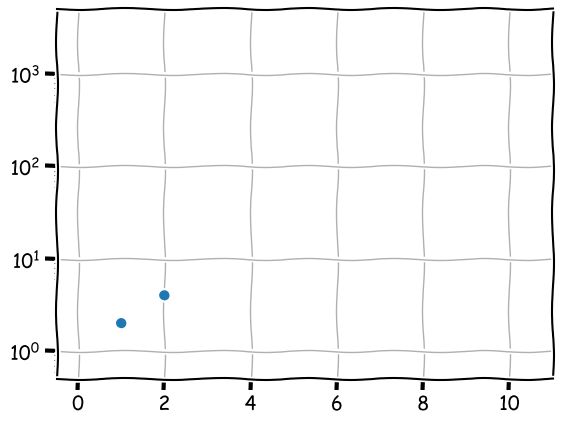

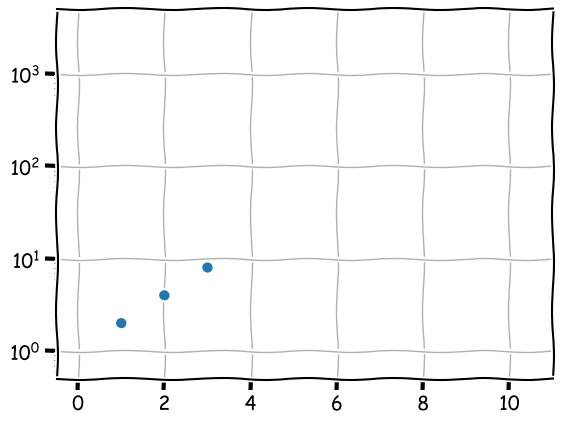

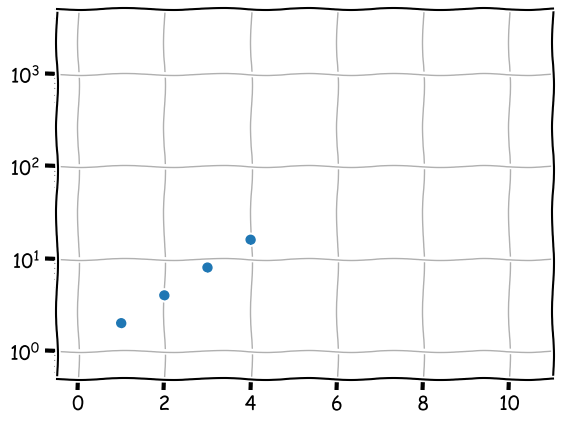

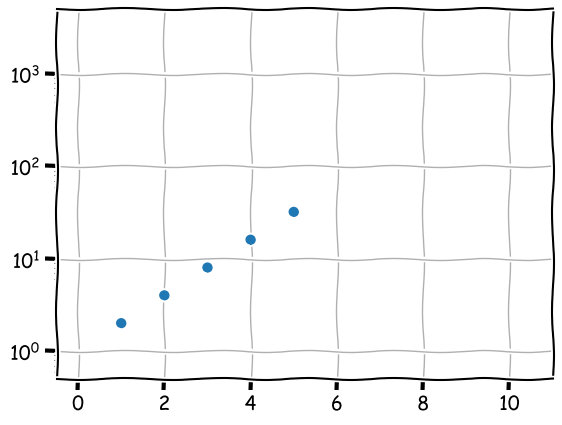

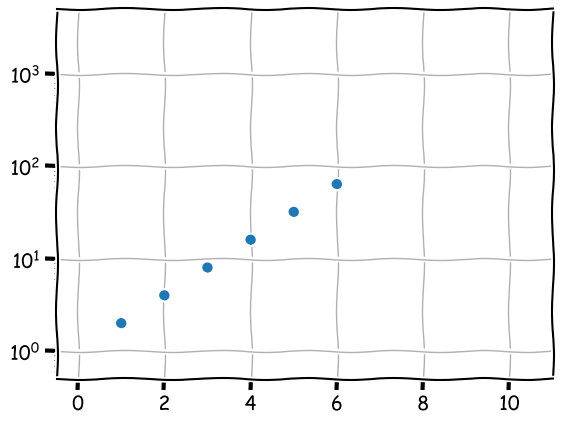

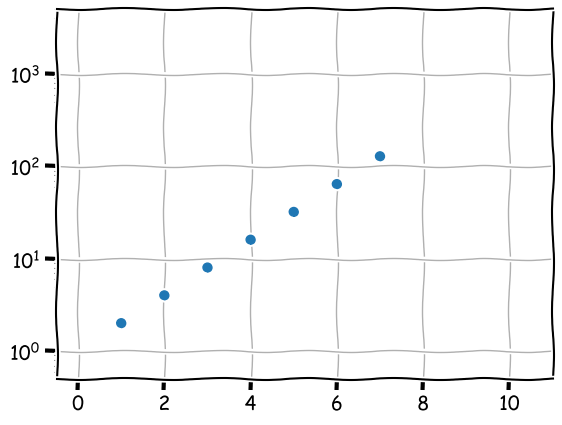

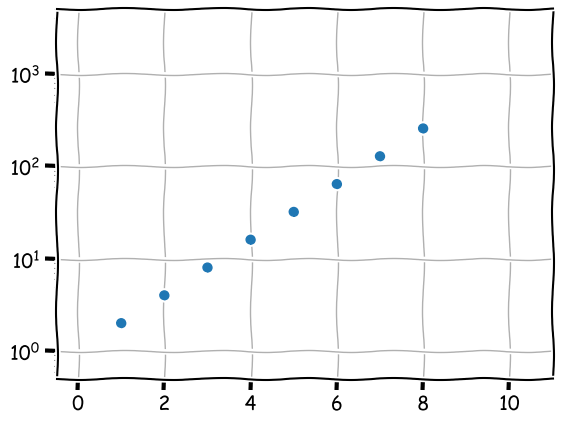

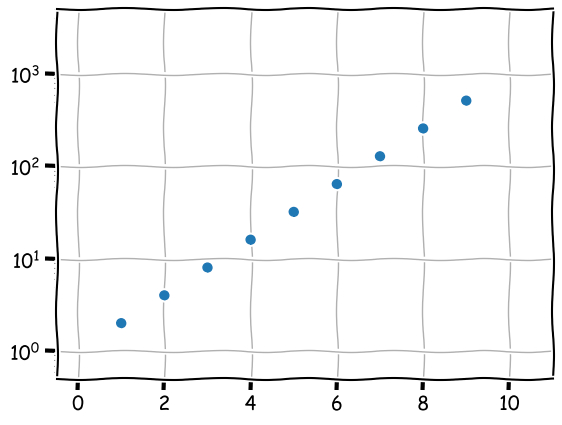

In [156]:
x = np.arange(1, 11)
y = 2**x
for i in range(len(x)):
    fig, ax = plt.subplots()
    ax.plot(x[:i], y[:i], 'o')
    ax.set_xlim(-.5, 11)
    ax.set_ylim(0.5, 5E3)
    ax.set_yscale('log')
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    plt.savefig(f'Figures_Movie/04_Exponential_Base_10/Log_Lin_Base_10_{i:02}.png', fig=fig)

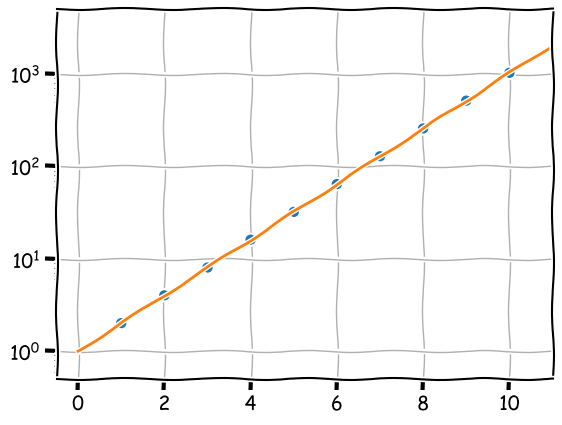

In [157]:
x = np.arange(1, 11)
y = 2**x
fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot([0, 11],[1, 2**11],'-')
ax.set_xlim(-.5, 11)
ax.set_ylim(0.5, 5E3)
ax.set_yscale('log')
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig(f'Figures_Movie/04_Exponential_Base_10/Log_Lin_Base_10_fit.png', fig=fig)

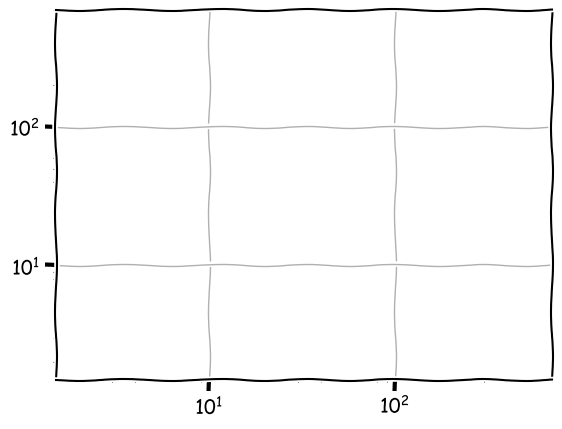

In [168]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots()
ax.set_xlim(1.5, 700)
ax.set_ylim(1.5, 700)
ax.set_yscale('log')
ax.set_xscale('log')
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig('Figures_Movie/04_Exponential_Base_10/Log_Log_Base_10_00.png', fig=fig)

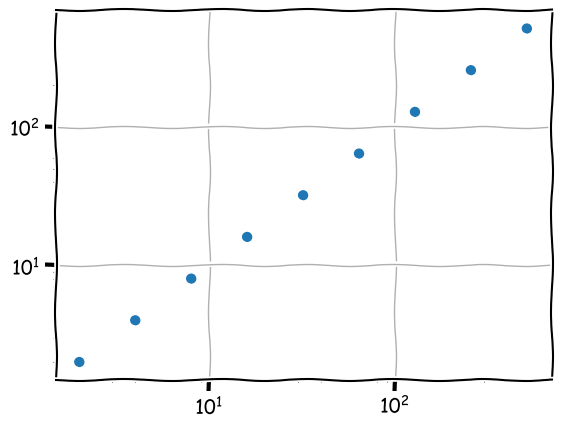

In [169]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots()
ax.plot(y[:-1], diff, 'o')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1.5, 700)
ax.set_ylim(1.5, 700)
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
plt.savefig('Figures_Movie/04_Exponential_Base_10/Log_Log_Base_10_01.png', fig=fig)

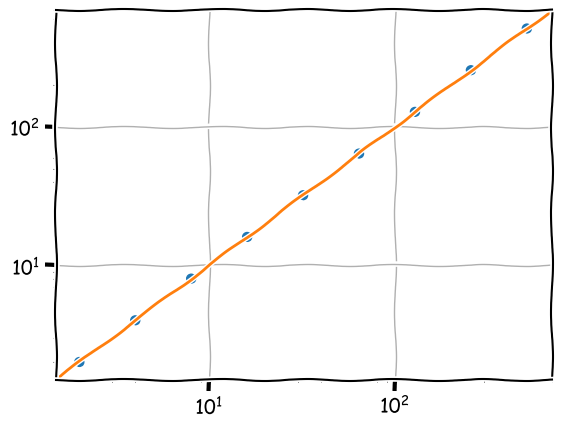

In [170]:
x = np.arange(1, 11)
y = 2**x
diff = np.diff(y)
fig, ax = plt.subplots()
ax.plot(y[:-1], diff, 'o')
ax.set_yscale('log')
ax.set_xscale('log')
ax.xaxis.grid(linewidth=1.0)
ax.yaxis.grid(linewidth=1.0)
ax.plot([1, 2**11], [1, 2**11])
ax.set_xlim(1.5, 700)
ax.set_ylim(1.5, 700)
plt.savefig('Figures_Movie/04_Exponential_Base_10/Log_Log_Base_10_fit.png', fig=fig)

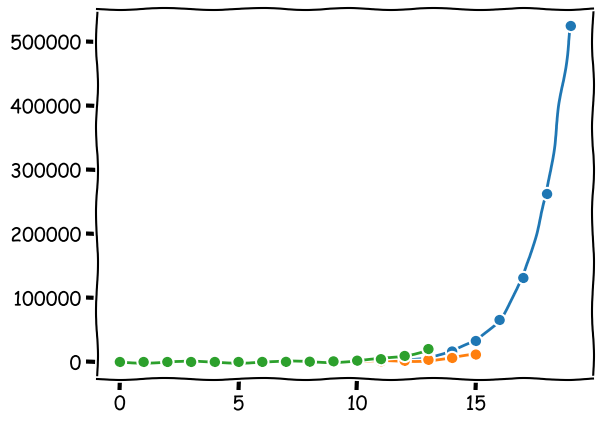

In [188]:
x1 = np.arange(0, 20)
x2 = np.arange(0, 16)
x3 = np.arange(0, 14)

y1 = 2**x1
y2 = 2**(.9*x2)
y3 = 2**(1.1*x3)

plt.plot(x1, y1, 'o-')
plt.plot(x2, y2, 'o-')
plt.plot(x3, y3, 'o-')

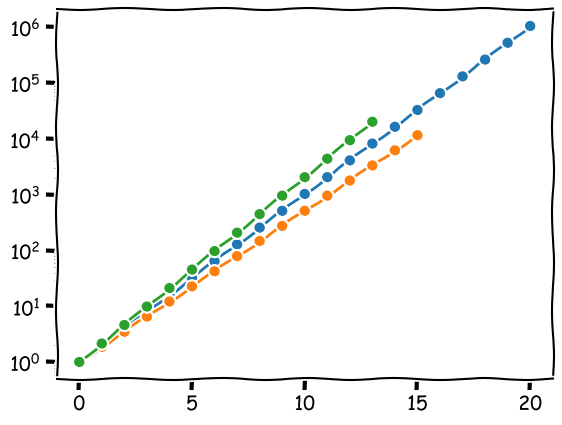

In [181]:
x1 = np.arange(0, 21)
x2 = np.arange(0, 16)
x3 = np.arange(0, 14)

y1 = 2**x1
y2 = 2**(.9*x2)
y3 = 2**(1.1*x3)

plt.plot(x1, y1, 'o-')
plt.plot(x2, y2, 'o-')
plt.plot(x3, y3, 'o-')
plt.yscale('log')

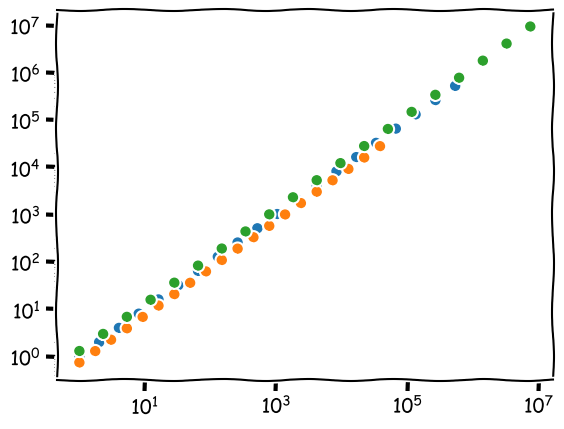

In [187]:
x1 = np.arange(0, 21)
x2 = np.arange(0, 16)
x3 = np.arange(0, 14)

y1 = 2**x1
y2 = 2**(.9*x2)
y3 = 2**(1.1*x3)

diff1 = np.diff(y1)
diff2 = np.diff(y2)
diff3 = np.diff(y3)

plt.plot(y1[:-1], diff1, 'o')
plt.plot(y2[:-1], diff2, 'o')
plt.plot(y3[:-1], diff3, 'o')
plt.xscale('log')
plt.yscale('log')